In [ ]:
# ✅ 필수 패키지 설치__인허가  영업기회
!pip install --upgrade gspread gspread_dataframe oauth2client requests

# ✅ 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

# ✅ 라이브러리 불러오기
import pandas as pd
import re
import requests
from concurrent.futures import ThreadPoolExecutor
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from gspread_dataframe import get_as_dataframe, set_with_dataframe

# ✅ 설정
KAKAO_API_KEY = "af04a0a8e5416c95eaa04cccc060031d"
CREDENTIALS_PATH = "/content/drive/My Drive/Key/credentials.json"


/content/drive/My Drive/시설/체납/월별체납관리/2025.04 고객부문 체납데이터(확정).csv
/content/drive/My Drive/시설/체납/월별수납관리/202505/G000_02995_00052.csv

위 구글수프레드시트 비교한다
ㅇ 컬럼 비교 기준은 청구번호, 청구년월, 청구순번, 계약번호, 서비스대 컬럼기준으로 매핑하여
G000_02995_00052.csv의 수납 합계, 수납일자, 실입금일, 은행, 계좌번호 컬럼값을  2025.04 고객부문 체납데이터(확정).csv 맨 우측 빈열에 순차적으로 적용한다


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
print(df_debt.columns.tolist())

NameError: name 'df_debt' is not defined

In [ ]:
# ✅ '강북/강원본부'만 필터링
df_gangbuk = df_merged[df_merged['미납관리본부'] == '강북/강원본부']

# ✅ 저장 경로 지정
output_path = "/content/drive/My Drive/시설/체납/월별체납관리/강북_강원본부_병합결과.xlsx"

# ✅ Excel 파일로 저장 (인코딩 주의 필요 없음)
df_gangbuk.to_excel(output_path, index=False)

print(f"✅ '강북/강원본부' 병합 결과가 엑셀 파일로 저장되었습니다:\n{output_path}")

✅ '강북/강원본부' 병합 결과가 엑셀 파일로 저장되었습니다:
/content/drive/My Drive/시설/체납/월별체납관리/강북_강원본부_병합결과.xlsx


In [ ]:
import pandas as pd

# ✅ 컬럼명 정리
df_merged.columns = df_merged.columns.str.strip().str.replace('\n', '').str.replace('\r', '')

# ✅ 숫자형 변환
df_merged['합산체납'] = pd.to_numeric(df_merged['합산체납'], errors='coerce')
df_merged['수납 합계'] = pd.to_numeric(df_merged['수납 합계'], errors='coerce')

# ✅ 현황표 요약 계산
현황요약 = df_merged.groupby('미납관리부서').agg({
    '합산체납': 'sum',
    '수납 합계': 'sum'
}).reset_index()

현황요약['미납 금액'] = 현황요약['합산체납'] - 현황요약['수납 합계']
현황요약['수납률 (%)'] = (현황요약['수납 합계'] / 현황요약['합산체납'] * 100).round(2)
현황요약['미납률 (%)'] = (현황요약['미납 금액'] / 현황요약['합산체납'] * 100).round(2)

# ✅ 미리보기 출력
from IPython.display import display
display(현황요약)

# ✅ 엑셀 저장
output_path = "/content/drive/MyDrive/시설/체납/월별체납관리/현황표_최종.xlsx"
현황요약.to_excel(output_path, index=False)

print(f"✅ 다운로드용 현황표 저장 완료: {output_path}")

,미납관리부서,합산체납,수납 합계,미납 금액,수납률 (%),미납률 (%)
0,강남SI영업팀,37038562.0,0.0,37038562.0,0.0,100.0
1,강남법인영업1팀,8695839.0,0.0,8695839.0,0.0,100.0
2,강남법인영업2팀,21305107.0,0.0,21305107.0,0.0,100.0
3,강남법인영업3팀,11760573.0,0.0,11760573.0,0.0,100.0
4,강남지사,173348116.0,0.0,173348116.0,0.0,100.0
...,...,...,...,...,...,...
62,충남/충북법인영업2팀,22177360.0,0.0,22177360.0,0.0,100.0
63,충남서부지사,102368704.0,0.0,102368704.0,0.0,100.0
64,충북지사,199071955.0,0.0,199071955.0,0.0,100.0
65,평택지사,215472513.0,0.0,215472513.0,0.0,100.0


✅ 다운로드용 현황표 저장 완료: /content/drive/MyDrive/시설/체납/월별체납관리/현황표_최종.xlsx


In [3]:
!pip install --upgrade gspread gspread_dataframe oauth2client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 6.2.0
    Uninstalling gspread-6.2.0:
      Successfully uninstalled gspread-6.2.0


In [7]:
# ✅ Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# ✅ 라이브러리 설치
!pip install --upgrade gspread gspread_dataframe oauth2client

# ✅ 라이브러리 불러오기
import pandas as pd
import gspread
from gspread_dataframe import set_with_dataframe
from oauth2client.service_account import ServiceAccountCredentials

# ✅ 경로 설정
체납_파일 = "/content/drive/My Drive/시설/체납/월별체납관리/2025.04 고객부문 체납데이터(확정).csv"
수납_파일_1 = "/content/drive/My Drive/시설/체납/월별수납관리/202505월/수납0510-0515/C150_G0000_00075.csv"
수납_파일_2 = "/content/drive/My Drive/시설/체납/월별수납관리/202505월/수납0510-0515/P000_P000_00076.csv"
병합_파일 = "/content/drive/My Drive/시설/체납/월별수납관리/merged_output.csv"
CREDENTIALS_PATH = "/content/drive/My Drive/Key/credentials.json"

# ✅ 수납 파일 병합 및 저장
df1 = pd.read_csv(수납_파일_1, encoding='cp949')
df2 = pd.read_csv(수납_파일_2, encoding='cp949')
df_pay = pd.concat([df1, df2], ignore_index=True)
df_pay.to_csv(병합_파일, index=False, encoding='cp949')
print("✅ 수납 파일 병합 완료:", 병합_파일)

# ✅ 인증
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_name(CREDENTIALS_PATH, scope)
gc = gspread.authorize(creds)

# ✅ 체납 및 수납 데이터 불러오기
df_debt = pd.read_csv(체납_파일, encoding='cp949')
df_pay = pd.read_csv(병합_파일, encoding='cp949')

# ✅ 컬럼 정리
df_debt.columns = df_debt.columns.str.strip().str.replace('\n', '').str.replace('\r', '')
df_pay.columns = df_pay.columns.str.strip().str.replace('\n', '').str.replace('\r', '')

# ✅ 병합
merge_keys = ['청구번호', '청구년월', '청구순번', '계약번호', '서비스대']
수납컬럼 = ['수납 합계', '수납일자', '실입금일', '은행', '계좌번호']
df_pay_filtered = df_pay[merge_keys + 수납컬럼]
df_merged = pd.merge(df_debt, df_pay_filtered, on=merge_keys, how='left')

# ✅ Google Sheets 문서 생성
spreadsheet = gc.create("2025.04 체납데이터 본부별 병합결과")
yellow_rgb = {"red": 1.0, "green": 1.0, "blue": 0.6}

# ✅ 본부별 시트 생성 및 업로드
group_key = '미납관리본부'
본부별그룹 = df_merged[group_key].dropna().unique()

for 본부 in 본부별그룹:
    df_sub = df_merged[df_merged[group_key] == 본부]
    시트명 = 본부[:100]
    try:
        worksheet = spreadsheet.add_worksheet(title=시트명, rows=str(len(df_sub)+10), cols=str(len(df_sub.columns)+5))
    except:
        print(f"⚠️ '{시트명}' 시트 생성 실패 — 이미 존재할 수 있음")
        continue
    set_with_dataframe(worksheet, df_sub)

    # 노란 배경색 적용
    start_col = len(df_sub.columns) - len(수납컬럼)
    end_col = len(df_sub.columns)
    sheet_id = worksheet._properties['sheetId']

    requests = [{
        "repeatCell": {
            "range": {
                "sheetId": sheet_id,
                "startRowIndex": 1,
                "startColumnIndex": start_col,
                "endColumnIndex": end_col
            },
            "cell": {
                "userEnteredFormat": {
                    "backgroundColor": yellow_rgb
                }
            },
            "fields": "userEnteredFormat.backgroundColor"
        }
    }]
    spreadsheet.batch_update({"requests": requests})
    print(f"✅ '{시트명}' 시트 업로드 및 색상 적용 완료")

print("🎉 모든 본부별 시트 업로드 및 노란색 적용 완료")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ 수납 파일 병합 완료: /content/drive/My Drive/시설/체납/월별수납관리/merged_output.csv


<ipython-input-7-a074a99b3a72>:34: DtypeWarning: Columns (2,3,4,5,6,7,8,9,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,35,36,37,38,39,40,41,42,43,44,45,46,47,48,58,59,60,61,62,63,64,67,68,112,114,115,116) have mixed types. Specify dtype option on import or set low_memory=False.
  df_debt = pd.read_csv(체납_파일, encoding='cp949')


✅ '강남/서부본부' 시트 업로드 및 색상 적용 완료
✅ '기업고객본부' 시트 업로드 및 색상 적용 완료
✅ '충남/충북본부' 시트 업로드 및 색상 적용 완료
✅ '강북/강원본부' 시트 업로드 및 색상 적용 완료
✅ '전남/전북본부' 시트 업로드 및 색상 적용 완료
✅ '대구/경북본부' 시트 업로드 및 색상 적용 완료
✅ '부산/경남본부' 시트 업로드 및 색상 적용 완료
🎉 모든 본부별 시트 업로드 및 노란색 적용 완료


In [6]:
# ✅ '강북/강원본부'만 필터링
df_gangbuk = df_merged[df_merged['미납관리본부'] == '강북/강원본부']

# ✅ 저장 경로 지정
output_path = "/content/drive/My Drive/시설/체납/월별체납관리/강북_강원본부_병합결과.xlsx"

# ✅ Excel 파일로 저장 (인코딩 주의 필요 없음)
df_gangbuk.to_excel(output_path, index=False)

print(f"✅ '강북/강원본부' 병합 결과가 엑셀 파일로 저장되었습니다:\n{output_path}")

✅ '강북/강원본부' 병합 결과가 엑셀 파일로 저장되었습니다:
/content/drive/My Drive/시설/체납/월별체납관리/강북_강원본부_병합결과.xlsx


In [ ]:
# ✅ Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# ✅ 라이브러리 설치
!pip install --upgrade gspread gspread_dataframe oauth2client requests

# ✅ 라이브러리 불러오기
import pandas as pd
import gspread
import requests
from concurrent.futures import ThreadPoolExecutor
from gspread_dataframe import set_with_dataframe
from oauth2client.service_account import ServiceAccountCredentials
import re

# ✅ 카카오 API 키
KAKAO_API_KEY = "af04a0a8e5416c95eaa04cccc060031d"

# ✅ 경로 설정
체납_파일 = "/content/drive/My Drive/시설/체납/월별체납관리/2025.04 고객부문 체납데이터(확정).csv"
수납_파일_1 = "/content/drive/My Drive/시설/체납/월별수납관리/202505월/G000_02995_00052.csv"
수납_파일_2 = "/content/drive/My Drive/시설/체납/월별수납관리/202505월/P000_P000_00022.csv"
병합_파일 = "/content/drive/My Drive/시설/체납/월별수납관리/merged_output.csv"
CREDENTIALS_PATH = "/content/drive/My Drive/Key/credentials.json"

# ✅ 수납 파일 병합
df1 = pd.read_csv(수납_파일_1, encoding='cp949')
df2 = pd.read_csv(수납_파일_2, encoding='cp949')
df_pay = pd.concat([df1, df2], ignore_index=True)
df_pay.to_csv(병합_파일, index=False, encoding='cp949')

# ✅ 인증
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_name(CREDENTIALS_PATH, scope)
gc = gspread.authorize(creds)

# ✅ 체납 데이터 불러오기
df_debt = pd.read_csv(체납_파일, encoding='cp949')
df_pay = pd.read_csv(병합_파일, encoding='cp949')

# ✅ 컬럼 정리 및 병합
df_debt.columns = df_debt.columns.str.strip().str.replace('\n', '').str.replace('\r', '')
df_pay.columns = df_pay.columns.str.strip().str.replace('\n', '').str.replace('\r', '')

merge_keys = ['청구번호', '청구년월', '청구순번', '계약번호', '서비스대']
수납컬럼 = ['수납 합계', '수납일자', '실입금일', '은행', '계좌번호']
df_pay_filtered = df_pay[merge_keys + 수납컬럼]
df_merged = pd.merge(df_debt, df_pay_filtered, on=merge_keys, how='left')

# ✅ 주소 정제 함수
def clean_address(addr):
    addr = str(addr)
    addr = re.sub(r'\(.*?\)', '', addr)
    addr = re.sub(r'\d+층|\d+호', '', addr)
    addr = re.sub(r'[^\w\s가-힣-]', '', addr)
    addr = re.sub(r'\s+', ' ', addr).strip()
    return addr

# ✅ 위도/경도 요청 함수
def get_lat_lng_kakao(address):
    query = clean_address(address)
    url = f"https://dapi.kakao.com/v2/local/search/address.json?query={query}"
    headers = {"Authorization": f"KakaoAK {KAKAO_API_KEY}"}
    try:
        res = requests.get(url, headers=headers)
        if res.status_code == 200:
            doc = res.json().get('documents', [])
            if doc:
                loc = doc[0].get('road_address') or doc[0].get('address')
                if loc:
                    return loc['y'], loc['x']
    except:
        pass
    return None, None

# ✅ 주소 컬럼 추출 및 좌표 계산
df_addr = df_merged[['설치주소']].dropna().copy()
df_addr['cleaned'] = df_addr['설치주소'].apply(clean_address)
with ThreadPoolExecutor(max_workers=10) as executor:
    latlng = list(executor.map(get_lat_lng_kakao, df_addr['cleaned'].tolist()))
df_addr['위도'], df_addr['경도'] = zip(*latlng)

# ✅ 위도/경도 붙이기
df_merged = pd.concat([df_merged.reset_index(drop=True), df_addr[['위도', '경도']]], axis=1)

# ✅ Google Sheets 문서 생성
spreadsheet = gc.create("2025.04 체납데이터 본부별 병합결과")
yellow_rgb = {"red": 1.0, "green": 1.0, "blue": 0.6}

# ✅ 본부별 시트 생성
group_key = '미납관리본부'
for 본부 in df_merged[group_key].dropna().unique():
    df_sub = df_merged[df_merged[group_key] == 본부]
    시트명 = 본부[:100]
    worksheet = spreadsheet.add_worksheet(title=시트명, rows=str(len(df_sub)+10), cols=str(len(df_sub.columns)+5))
    set_with_dataframe(worksheet, df_sub)

print("✅ 전체 시트 생성 및 위경도 포함 완료")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-3-bf9856346e5f>:39: DtypeWarning: Columns (2,3,4,5,6,7,8,9,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,35,36,37,38,39,40,41,42,43,44,45,46,47,48,58,59,60,61,62,63,64,67,68,112,114,115,116) have mixed types. Specify dtype option on import or set low_memory=False.
  df_debt = pd.read_csv(체납_파일, encoding='cp949')


KeyboardInterrupt: 

In [ ]:
# ✅ 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# ✅ 필요 패키지 설치
!pip install --upgrade gspread gspread_dataframe oauth2client requests

# ✅ 라이브러리 불러오기
import pandas as pd
import requests
from concurrent.futures import ThreadPoolExecutor
import re

# ✅ 경로 설정
csv_path = "/content/drive/My Drive/시설/체납/월별체납관리/2025.04 고객부문 체납데이터(확정).csv"
output_path = "/content/drive/My Drive/시설/체납/월별체납관리/설치주소_위경도결과.csv"

# ✅ 카카오 API KEY
KAKAO_API_KEY = "af04a0a8e5416c95eaa04cccc060031d"

# ✅ 주소 정제 함수
def clean_address(addr):
    addr = str(addr)
    addr = re.sub(r'\(.*?\)', '', addr)
    addr = re.sub(r'\d+층|\d+호', '', addr)
    addr = re.sub(r'[^\w\s가-힣-]', '', addr)
    addr = re.sub(r'\s+', ' ', addr).strip()
    return addr

# ✅ 위경도 요청 함수
def get_lat_lng_kakao(address):
    cleaned = clean_address(address)
    url = f"https://dapi.kakao.com/v2/local/search/address.json?query={cleaned}"
    headers = {"Authorization": f"KakaoAK {KAKAO_API_KEY}"}
    try:
        res = requests.get(url, headers=headers, timeout=3)
        if res.status_code == 200:
            doc = res.json()['documents']
            if doc:
                loc = doc[0].get('road_address') or doc[0].get('address')
                if loc: return loc['y'], loc['x']
    except:
        pass
    return None, None

# ✅ CSV 파일 불러오기
df = pd.read_csv(csv_path, encoding='cp949')
df.columns = df.columns.str.strip().str.replace('\n', '').str.replace('\r', '')

# ✅ 설치주소 컬럼 존재 확인 및 처리
if '설치주소' not in df.columns:
    raise KeyError("'설치주소' 컬럼이 존재하지 않습니다.")

df = df[['설치주소']].dropna().drop_duplicates().copy()

# ✅ 병렬 처리로 속도 개선 (설치주소 기준)
addresses = df['설치주소'].tolist()
with ThreadPoolExecutor(max_workers=20) as executor:
    lat_lng = list(executor.map(get_lat_lng_kakao, addresses))

df['위도'], df['경도'] = zip(*lat_lng)

# ✅ 결과 저장
df.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"✅ 위경도 결과 저장 완료: {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-2-0a7acd4d9f88>:47: DtypeWarning: Columns (2,3,4,5,6,7,8,9,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,35,36,37,38,39,40,41,42,43,44,45,46,47,48,58,59,60,61,62,63,64,67,68,112,114,115,116) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, encoding='cp949')


✅ 위경도 결과 저장 완료: /content/drive/My Drive/시설/체납/월별체납관리/설치주소_위경도결과.csv


In [ ]:
# ✅ '강북/강원본부'만 필터링
df_gangbuk = df_merged[df_merged['미납관리본부'] == '강북/강원본부']

# ✅ 저장 경로 지정
output_path = "/content/drive/My Drive/시설/체납/월별체납관리/강북_강원본부_병합결과_지도적용.xlsx"

# ✅ Excel 파일로 저장 (인코딩 주의 필요 없음)
df_gangbuk.to_excel(output_path, index=False)

print(f"✅ '강북/강원본부' 병합 결과가 엑셀 파일로 저장되었습니다:\n{output_path}")

In [ ]:
# ✅ Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# ✅ 패키지 설치
!pip install --upgrade gspread gspread_dataframe oauth2client requests

# ✅ 라이브러리 로딩
import pandas as pd
import requests
from concurrent.futures import ThreadPoolExecutor
import re

# ✅ 경로 설정
csv_path = "/content/drive/My Drive/시설/체납/월별체납관리/2025.04 고객부문 체납데이터(확정).csv"
output_path = "/content/drive/My Drive/시설/체납/월별체납관리/설치주소_위경도_지도링크_결과.csv"

# ✅ 카카오 API KEY 입력
KAKAO_API_KEY = "af04a0a8e5416c95eaa04cccc060031d"

# ✅ 주소 정제 함수
def clean_address(addr):
    addr = str(addr)
    addr = re.sub(r'\(.*?\)', '', addr)
    addr = re.sub(r'\d+층|\d+호', '', addr)
    addr = re.sub(r'[^\w\s가-힣-]', '', addr)
    addr = re.sub(r'\s+', ' ', addr).strip()
    return addr

# ✅ 위도/경도 요청 함수
def get_lat_lng_kakao(address):
    cleaned = clean_address(address)
    url = f"https://dapi.kakao.com/v2/local/search/address.json?query={cleaned}"
    headers = {"Authorization": f"KakaoAK {KAKAO_API_KEY}"}
    try:
        res = requests.get(url, headers=headers, timeout=3)
        if res.status_code == 200:
            doc = res.json()['documents']
            if doc:
                loc = doc[0].get('road_address') or doc[0].get('address')
                if loc: return loc['y'], loc['x']
    except:
        pass
    return None, None

# ✅ 데이터 불러오기 및 전처리
df = pd.read_csv(csv_path, encoding='cp949')
df.columns = df.columns.str.strip().str.replace('\n', '').str.replace('\r', '')

if '설치주소' not in df.columns:
    raise KeyError("'설치주소' 컬럼이 존재하지 않습니다.")

df = df[['설치주소']].dropna().drop_duplicates().copy()

# ✅ 병렬 위경도 추출
addresses = df['설치주소'].tolist()
with ThreadPoolExecutor(max_workers=20) as executor:
    lat_lng = list(executor.map(get_lat_lng_kakao, addresses))

df['위도'], df['경도'] = zip(*lat_lng)

# ✅ 지도링크 및 좌표 문자열 생성
df['지도링크'] = df.apply(lambda row: f"https://www.google.com/maps?q={row['위도']},{row['경도']}"
                           if pd.notnull(row['위도']) else "", axis=1)
df['좌표(위도,경도)'] = df.apply(lambda row: f"{row['위도']},{row['경도']}"
                             if pd.notnull(row['위도']) else "", axis=1)

# ✅ 저장
df.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"✅ 설치주소 위경도 및 지도링크 결과 저장 완료: {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-3-488791264783>:47: DtypeWarning: Columns (2,3,4,5,6,7,8,9,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,35,36,37,38,39,40,41,42,43,44,45,46,47,48,58,59,60,61,62,63,64,67,68,112,114,115,116) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, encoding='cp949')


✅ 설치주소 위경도 및 지도링크 결과 저장 완료: /content/drive/My Drive/시설/체납/월별체납관리/설치주소_위경도_지도링크_결과.csv


In [ ]:
# ✅ '강북/강원본부'만 필터링
df_gangbuk = df_merged[df_merged['미납관리본부'] == '강북/강원본부']

# ✅ 저장 경로 지정
output_path = "/content/drive/My Drive/시설/체납/월별체납관리/강북_강원본부_병합결과.xlsx"

# ✅ Excel 파일로 저장 (인코딩 주의 필요 없음)
df_gangbuk.to_excel(output_path, index=False)

print(f"✅ '강북/강원본부' 병합 결과가 엑셀 파일로 저장되었습니다:\n{output_path}")

✅ '강북/강원본부' 병합 결과가 엑셀 파일로 저장되었습니다:
/content/drive/My Drive/시설/체납/월별체납관리/강북_강원본부_병합결과.xlsx


In [ ]:
Sub 납부구분_자동입력()
    Dim ws As Worksheet
    Dim lastRow As Long
    Dim i As Long
    Dim 합산체납 As Double
    Dim 수납합계 As Double

    Set ws = ThisWorkbook.Sheets("DB") ' 시트 이름은 실제 사용 중인 이름으로 변경
    lastRow = ws.Cells(ws.Rows.Count, "DH").End(xlUp).Row

    For i = 2 To lastRow
        합산체납 = Val(ws.Cells(i, "DH").Value)  ' DH = 112열
        수납합계 = Val(ws.Cells(i, "DP").Value)  ' DP = 120열

        If 수납합계 = 0 Then
            ws.Cells(i, 118).Value = "미납"        ' DN열 = 118
        ElseIf 수납합계 > 0 And 수납합계 < 합산체납 Then
            ws.Cells(i, 118).Value = "부분납"
        ElseIf 수납합계 >= 합산체납 Then
            ws.Cells(i, 118).Value = "완납"
        Else
            ws.Cells(i, 118).Value = "확인필요"
        End If
    Next i

    MsgBox "납부구분 입력이 완료되었습니다.", vbInformation
End Sub

In [ ]:
Sub 납부구분_자동입력()
    Dim ws As Worksheet
    Dim lastRow As Long
    Dim i As Long
    Dim 합산체납 As Double
    Dim 수납합계 As Variant  ' 비어있는 셀도 처리하기 위해 Variant 사용

    Set ws = ThisWorkbook.Sheets("DB") ' 실제 시트명으로 바꾸세요
    lastRow = ws.Cells(ws.Rows.Count, "DH").End(xlUp).Row

    For i = 2 To lastRow
        합산체납 = Val(ws.Cells(i, "DH").Value)
        수납합계 = ws.Cells(i, "DP").Value

        If IsEmpty(수납합계) Or Trim(수납합계) = "" Then
            ws.Cells(i, 118).Value = "미납" ' DN 열 = 118
        ElseIf Val(수납합계) = 합산체납 Then
            ws.Cells(i, 118).Value = "완납"
        Else
            ws.Cells(i, 118).Value = "부분납"
        End If
    Next i

    MsgBox "납부구분 입력이 완료되었습니다.", vbInformation
End Sub

In [ ]:
# 청구년월 202205-202505, 수납일자 20250101-현재

In [8]:
# ✅ Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# ✅ 라이브러리 설치
!pip install --upgrade gspread gspread_dataframe oauth2client

# ✅ 라이브러리 불러오기
import pandas as pd
import gspread
from gspread_dataframe import set_with_dataframe
from oauth2client.service_account import ServiceAccountCredentials

# ✅ 경로 설정
체납_파일 = "/content/drive/My Drive/시설/체납/월별체납관리/(청구202205)2025.04 고객부문 체납데이터(확정).csv"
수납_파일_1 = "/content/drive/My Drive/시설/체납/월별수납관리/202505월/수납0510-0515/C150_G0000_00075.csv"
수납_파일_2 = "/content/drive/My Drive/시설/체납/월별수납관리/202505월/수납0510-0515/P000_P000_00076.csv"
병합_파일 = "/content/drive/My Drive/시설/체납/월별수납관리/merged_output.csv"
CREDENTIALS_PATH = "/content/drive/My Drive/Key/credentials.json"

# ✅ 수납 파일 병합 및 저장
df1 = pd.read_csv(수납_파일_1, encoding='cp949')
df2 = pd.read_csv(수납_파일_2, encoding='cp949')
df_pay = pd.concat([df1, df2], ignore_index=True)
df_pay.to_csv(병합_파일, index=False, encoding='cp949')
print("✅ 수납 파일 병합 완료:", 병합_파일)

# ✅ 인증
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_name(CREDENTIALS_PATH, scope)
gc = gspread.authorize(creds)

# ✅ 체납 및 수납 데이터 불러오기
df_debt = pd.read_csv(체납_파일, encoding='cp949')
df_pay = pd.read_csv(병합_파일, encoding='cp949')

# ✅ 컬럼 정리
df_debt.columns = df_debt.columns.str.strip().str.replace('\n', '').str.replace('\r', '')
df_pay.columns = df_pay.columns.str.strip().str.replace('\n', '').str.replace('\r', '')

# ✅ 병합
merge_keys = ['청구번호', '청구년월', '청구순번', '계약번호', '서비스대']
수납컬럼 = ['수납 합계', '수납일자', '실입금일', '은행', '계좌번호']
df_pay_filtered = df_pay[merge_keys + 수납컬럼]
df_merged = pd.merge(df_debt, df_pay_filtered, on=merge_keys, how='left')

# ✅ Google Sheets 문서 생성
spreadsheet = gc.create("2025.04 체납데이터 본부별 병합결과")
yellow_rgb = {"red": 1.0, "green": 1.0, "blue": 0.6}

# ✅ 본부별 시트 생성 및 업로드
group_key = '미납관리본부'
본부별그룹 = df_merged[group_key].dropna().unique()

for 본부 in 본부별그룹:
    df_sub = df_merged[df_merged[group_key] == 본부]
    시트명 = 본부[:100]
    try:
        worksheet = spreadsheet.add_worksheet(title=시트명, rows=str(len(df_sub)+10), cols=str(len(df_sub.columns)+5))
    except:
        print(f"⚠️ '{시트명}' 시트 생성 실패 — 이미 존재할 수 있음")
        continue
    set_with_dataframe(worksheet, df_sub)

    # 노란 배경색 적용
    start_col = len(df_sub.columns) - len(수납컬럼)
    end_col = len(df_sub.columns)
    sheet_id = worksheet._properties['sheetId']

    requests = [{
        "repeatCell": {
            "range": {
                "sheetId": sheet_id,
                "startRowIndex": 1,
                "startColumnIndex": start_col,
                "endColumnIndex": end_col
            },
            "cell": {
                "userEnteredFormat": {
                    "backgroundColor": yellow_rgb
                }
            },
            "fields": "userEnteredFormat.backgroundColor"
        }
    }]
    spreadsheet.batch_update({"requests": requests})
    print(f"✅ '{시트명}' 시트 업로드 및 색상 적용 완료")

print("🎉 모든 본부별 시트 업로드 및 노란색 적용 완료")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ 수납 파일 병합 완료: /content/drive/My Drive/시설/체납/월별수납관리/merged_output.csv


<ipython-input-8-643ba09b51d7>:34: DtypeWarning: Columns (2,3,4,5,6,7,8,9,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,35,36,37,38,39,40,41,42,43,44,45,46,47,48,58,59,60,61,62,63,64,67,68,112,114,115,116) have mixed types. Specify dtype option on import or set low_memory=False.
  df_debt = pd.read_csv(체납_파일, encoding='cp949')


✅ '강남/서부본부' 시트 업로드 및 색상 적용 완료
✅ '기업고객본부' 시트 업로드 및 색상 적용 완료
✅ '충남/충북본부' 시트 업로드 및 색상 적용 완료
✅ '강북/강원본부' 시트 업로드 및 색상 적용 완료
✅ '전남/전북본부' 시트 업로드 및 색상 적용 완료
✅ '대구/경북본부' 시트 업로드 및 색상 적용 완료
✅ '부산/경남본부' 시트 업로드 및 색상 적용 완료
🎉 모든 본부별 시트 업로드 및 노란색 적용 완료


In [11]:
# ✅ '강북/강원본부'만 필터링
df_gangbuk = df_merged[df_merged['미납관리본부'] == '강북/강원본부']

# ✅ 저장 경로 지정
output_path = "/content/drive/My Drive/시설/체납/월별체납관리/강북_강원본부_병합결과.xlsx"

# ✅ Excel 파일로 저장 (인코딩 주의 필요 없음)
df_gangbuk.to_excel(output_path, index=False)

print(f"✅ '강북/강원본부' 병합 결과가 엑셀 파일로 저장되었습니다:\n{output_path}")

✅ '강북/강원본부' 병합 결과가 엑셀 파일로 저장되었습니다:
/content/drive/My Drive/시설/체납/월별체납관리/강북_강원본부_병합결과.xlsx


In [10]:
# ✅ 컬럼명 공백 제거
df_merged = df_merged.rename(columns=lambda x: x.strip())

# ✅ 숫자형으로 강제 변환
df_merged['합산체납'] = pd.to_numeric(df_merged['합산체납'], errors='coerce')
df_merged['수납 합계'] = pd.to_numeric(df_merged['수납 합계'], errors='coerce')

# ✅ 본부별 집계
df_rate = df_merged.groupby('미납관리본부').agg({
    '합산체납': 'sum',
    '수납 합계': 'sum'
}).reset_index()

# ✅ 미납 금액 계산
df_rate['미납 금액'] = df_rate['합산체납'] - df_rate['수납 합계']

# ✅ 수납률 및 미납률 계산
df_rate['수납률 (%)'] = (df_rate['수납 합계'] / df_rate['합산체납']) * 100
df_rate['미납률 (%)'] = (df_rate['미납 금액'] / df_rate['합산체납']) * 100

# ✅ 반올림
df_rate['수납률 (%)'] = df_rate['수납률 (%)'].round(2)
df_rate['미납률 (%)'] = df_rate['미납률 (%)'].round(2)

# ✅ 천 단위 콤마 포맷 (계산 완료 후)
for col in ['합산체납', '수납 합계', '미납 금액']:
    df_rate[col] = df_rate[col].apply(lambda x: f"{int(x):,}" if pd.notnull(x) else "")

# ✅ 결과 출력
# import ace_tools as tools; tools.display_dataframe_to_user(name="미납관리본부별 수납/미납 현황", dataframe=df_rate)

# Instead of using the custom module, display the dataframe directly
from IPython.display import display
display(df_rate.style.set_caption("미납관리본부별 수납/미납 현황"))

,미납관리본부,합산체납,수납 합계,미납 금액,수납률 (%),미납률 (%)
0,강남/서부본부,"1,605,377,114","67,097","1,605,310,017",0.000000,100.000000
1,강북/강원본부,"1,089,552,247",0,"1,089,552,247",0.000000,100.000000
2,기업고객본부,"278,524,800",0,"278,524,800",0.000000,100.000000
3,대구/경북본부,"503,810,069",0,"503,810,069",0.000000,100.000000
4,부산/경남본부,"769,667,188",0,"769,667,188",0.000000,100.000000
5,전남/전북본부,"791,268,829",0,"791,268,829",0.000000,100.000000
6,충남/충북본부,"717,647,137",0,"717,647,137",0.000000,100.000000


In [ ]:
import pandas as pd

# ✅ 컬럼명 정리
df_merged.columns = df_merged.columns.str.strip().str.replace('\n', '').str.replace('\r', '')

# ✅ 숫자형 변환
df_merged['합산체납'] = pd.to_numeric(df_merged['합산체납'], errors='coerce')
df_merged['수납 합계'] = pd.to_numeric(df_merged['수납 합계'], errors='coerce')

# ✅ 현황표 요약 계산
현황요약 = df_merged.groupby('미납관리부서').agg({
    '합산체납': 'sum',
    '수납 합계': 'sum'
}).reset_index()

현황요약['미납 금액'] = 현황요약['합산체납'] - 현황요약['수납 합계']
현황요약['수납률 (%)'] = (현황요약['수납 합계'] / 현황요약['합산체납'] * 100).round(2)
현황요약['미납률 (%)'] = (현황요약['미납 금액'] / 현황요약['합산체납'] * 100).round(2)

# ✅ 미리보기 출력
from IPython.display import display
display(현황요약)

# ✅ 엑셀 저장
output_path = "/content/drive/MyDrive/시설/체납/월별체납관리/현황표_최종.xlsx"
현황요약.to_excel(output_path, index=False)

print(f"✅ 다운로드용 현황표 저장 완료: {output_path}")

,미납관리부서,합산체납,수납 합계,미납 금액,수납률 (%),미납률 (%)
0,강남SI영업팀,0.0,0.0,0.0,NaN,NaN
1,강남법인영업1팀,0.0,0.0,0.0,NaN,NaN
2,강남법인영업2팀,0.0,0.0,0.0,NaN,NaN
3,강남법인영업3팀,290.0,0.0,290.0,0.0,100.0
4,강남지사,573497.0,0.0,573497.0,0.0,100.0
...,...,...,...,...,...,...
62,충남/충북법인영업2팀,692.0,0.0,692.0,0.0,100.0
63,충남서부지사,7560.0,0.0,7560.0,0.0,100.0
64,충북지사,9485.0,0.0,9485.0,0.0,100.0
65,평택지사,10527.0,0.0,10527.0,0.0,100.0


✅ 다운로드용 현황표 저장 완료: /content/drive/MyDrive/시설/체납/월별체납관리/현황표_최종.xlsx


<ipython-input-19-c85b5af3e5c4>:28: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-c85b5af3e5c4>:28: UserWarning: Glyph 45225 (\N{HANGUL SYLLABLE NAB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-c85b5af3e5c4>:28: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-c85b5af3e5c4>:28: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-c85b5af3e5c4>:28: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-c85b5af3e5c4>:28: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-c85b5af3e5c4>:28: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipyth

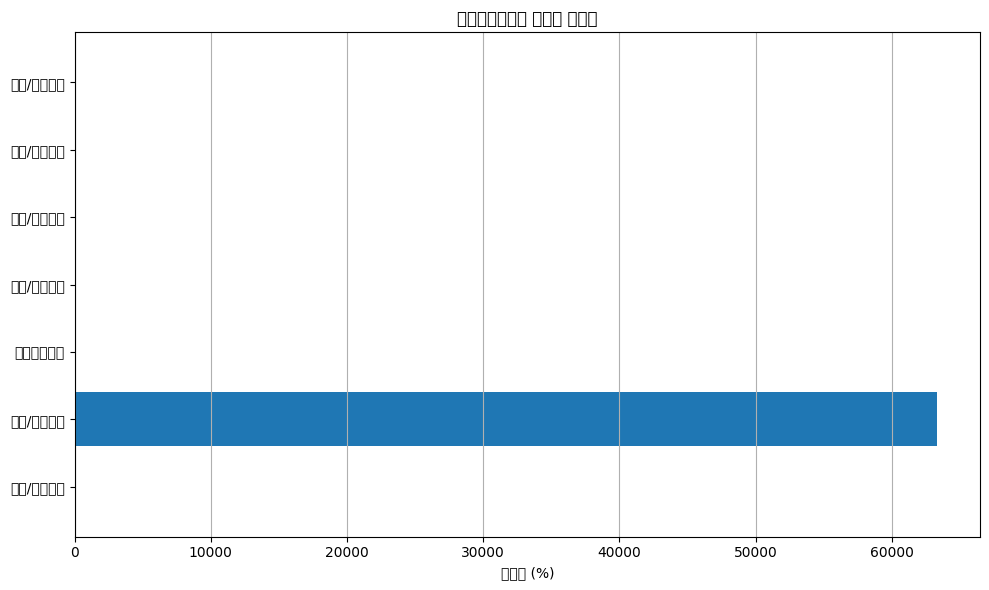

,미납관리본부,합산체납,수납 합계,미납 금액,수납률 (%),미납률 (%)
1,강북/강원본부,55618.0,35208784.0,-35153166.0,63304.66,-63204.66


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ df_merged에서 컬럼 정제 및 숫자 변환
df_merged.columns = df_merged.columns.str.strip().str.replace('\n', '').str.replace('\r', '')
df_merged['합산체납'] = pd.to_numeric(df_merged['합산체납'], errors='coerce')
df_merged['수납 합계'] = pd.to_numeric(df_merged['수납 합계'], errors='coerce')

# ✅ 현황표 생성
현황요약 = df_merged.groupby('미납관리본부').agg({
    '합산체납': 'sum',
    '수납 합계': 'sum'
}).reset_index()

현황요약['미납 금액'] = 현황요약['합산체납'] - 현황요약['수납 합계']
현황요약['수납률 (%)'] = (현황요약['수납 합계'] / 현황요약['합산체납'] * 100).round(2)
현황요약['미납률 (%)'] = (현황요약['미납 금액'] / 현황요약['합산체납'] * 100).round(2)

# ✅ 이상치 확인
이상수납 = 현황요약[(현황요약['수납률 (%)'] < 0) | (현황요약['수납률 (%)'] > 100)]

# ✅ 시각화: 수납률
plt.figure(figsize=(10, 6))
plt.barh(현황요약['미납관리본부'], 현황요약['수납률 (%)'])
plt.xlabel("수납률 (%)")
plt.title("미납관리본부별 수납률 시각화")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# ✅ 이상값 테이블 출력
from IPython.display import display
display(이상수납)

In [ ]:
# 예시: 특정 시트 수동으로 색상 재적용
sheet_title = "강남/서부본부"
worksheet = spreadsheet.worksheet(sheet_title)
sheet_id = worksheet._properties['sheetId']

start_col = len(df_merged.columns) - len(수납컬럼)
end_col = len(df_merged.columns)

requests = [{
    "repeatCell": {
        "range": {
            "sheetId": sheet_id,
            "startRowIndex": 1,
            "startColumnIndex": start_col,
            "endColumnIndex": end_col
        },
        "cell": {
            "userEnteredFormat": {
                "backgroundColor": {"red": 1.0, "green": 1.0, "blue": 0.6}
            }
        },
        "fields": "userEnteredFormat.backgroundColor"
    }
}]
spreadsheet.batch_update({"requests": requests})
print("✅ 색상 재적용 완료: 강남/서부본부 시트")

✅ 색상 재적용 완료: 강남/서부본부 시트


In [ ]:
import pandas as pd

# ✅ 파일 경로
file_path = "/content/drive/MyDrive/시설/체납/월별체납관리/미납관리본부별_수납미납현황.xlsx"

# ✅ 엑셀 불러오기
df = pd.read_excel(file_path)

# ✅ 컬럼명 공백 제거
df.columns = df.columns.str.strip()

# ✅ 필터링: 청구년월이 202410 ~ 202504 사이
df = df[(df['청구년월'] >= 202410) & (df['청구년월'] <= 202504)]

# ✅ 정렬: 미납관리본부, 미납관리부서 기준
df = df.sort_values(by=['미납관리본부', '미납관리부서'])

# ✅ 수치형 변환
df['합산체납'] = pd.to_numeric(df['합산체납'], errors='coerce')
df['수납 합계'] = pd.to_numeric(df['수납 합계'], errors='coerce')

# ✅ 천 원 단위로 변환 후 콤마 포맷
df['합산체납'] = df['합산체납'].div(1000).round().apply(lambda x: f"{int(x):,}" if pd.notnull(x) else "")
df['수납 합계'] = df['수납 합계'].div(1000).round().apply(lambda x: f"{int(x):,}" if pd.notnull(x) else "")

# ✅ 저장
output_path = "/content/drive/MyDrive/시설/체납/월별체납관리/미납관리본부별_수납미납현황_정리.xlsx"
df.to_excel(output_path, index=False)

print(f"✅ 정리 완료: {output_path}")# ✅ '강북/강원본부'만 필터링
df_gangbuk = df_merged[df_merged['미납관리본부'] == '강북/강원본부']

# ✅ 저장 경로 지정
output_path = "/content/drive/My Drive/시설/체납/월별체납관리/강북_강원본부_병합결과.xlsx"

# ✅ Excel 파일로 저장 (인코딩 주의 필요 없음)
df_gangbuk.to_excel(output_path, index=False)

print(f"✅ '강북/강원본부' 병합 결과가 엑셀 파일로 저장되었습니다:\n{output_path}")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/시설/체납/월별체납관리/미납관리본부별_수납미납현황.xlsx'

In [ ]:
# ✅ 전체 요약 테이블 Excel 저장
output_path = "/content/drive/My Drive/시설/체납/월별체납관리/미납관리본부별_수납미납현황.xlsx"
df_rate.to_excel(output_path, index=False)

print(f"✅ 저장 완료: {output_path}")

✅ 저장 완료: /content/drive/My Drive/시설/체납/월별체납관리/미납관리본부별_수납미납현황.xlsx


In [ ]:
['납조치', '계센터', ..., '청구년월\n', '합산체납', '수납 합계']

['납조치', '계센터', Ellipsis, '청구년월\n', '합산체납', '수납 합계']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 다시 저장
output_path = "/content/drive/MyDrive/시설/체납/월별체납관리/미납관리본부별_수납미납현황.xlsx"
df_rate.to_excel(output_path, index=False)

print(f"✅ 저장 완료: {output_path}")

✅ 저장 완료: /content/drive/MyDrive/시설/체납/월별체납관리/미납관리본부별_수납미납현황.xlsx


In [ ]:
import pandas as pd

# ✅ 엑셀 경로
file_path = "/content/drive/MyDrive/시설/체납/월별체납관리/수납현황_정리.xlsx"
df = pd.read_excel(file_path)

# ✅ 컬럼명 공백 및 줄바꿈 제거
df.columns = df.columns.str.strip().str.replace('\n', '').str.replace('\r', '')

# ✅ 필터링: 청구년월 202410 ~ 202504
df = df[(df['청구년월'] >= 202410) & (df['청구년월'] <= 202504)]

# ✅ 정렬
df = df.sort_values(by=['미납관리본부', '미납관리부서'])

# ✅ 숫자형 변환 및 천원 단위 적용
df['합산체납'] = pd.to_numeric(df['합산체납'], errors='coerce')
df['수납 합계'] = pd.to_numeric(df['수납 합계'], errors='coerce')

df['합산체납'] = df['합산체납'].div(1000).round().apply(lambda x: f"{int(x):,}" if pd.notnull(x) else "")
df['수납 합계'] = df['수납 합계'].div(1000).round().apply(lambda x: f"{int(x):,}" if pd.notnull(x) else "")

# ✅ 저장
output_path = "/content/drive/MyDrive/시설/체납/월별체납관리/미납관리본부별_수납미납현황_정리.xlsx"
df.to_excel(output_path, index=False)

print(f"✅ 정리 완료: {output_path}")

KeyError: '청구년월'

In [ ]:
!ls /content/drive/MyDrive

 005809004_COMPREHENSIVE.pdf
 006654451_COMPREHENSIVE.pdf
 007764885_COMPREHENSIVE.pdf
 008555238_COMPREHENSIVE.pdf
 03313-노트북
 0.세금계산서.pdf
 10월시스템보안정책.pdf
'1 2024년 6월 기관별 일시정지 현황.xlsx'
'1.'\''25년_파트너 업무위탁 계약서 및 부속합의서(A)_241227 개정(Ver 1) (1).pdf'
'1. (KT텔레캅)가망고객등록 매뉴얼.pdf'
'2020년 캘린더.gsheet'
'20241119_강북강원본부 사업지원팀 주간회의(자기계발포함)_박희본_v11.pdf'
 2024년-2025년해지DB.csv
 2024년-2025년해지DB_변환.csv
 2024년-2025년해지DB_변환.gsheet
'2024년 이러닝 8월 교육 과정 목록 및 신청서(2).xlsx'
'(20250113)예치보증금 확인서_(주)케이에스메이트.pdf'
'(20250115)정지 20개선관리 20검토결과 (1).pdf'
'(20250115)정지 20개선관리 20검토결과.gdoc'
'(20250115)정지 20개선관리 20검토결과.pdf'
'(20250122)영업팀장 정지관리 강화(교육)_소통.pdf'
'(20250213)기관별 정지현황_2.12일기준.pdf'
'(20250220)_본부별 한계돌파 관리고객 리텐ᄉ

In [ ]:
# ✅ 컬럼 전체 리스트 출력
print(df_merged.columns.tolist())

['미납조치년월', '회계센터구분', '구분1(부서별)', '구분2(체납구분)', '구분3(BM별)', '구분4(단계별)', '구분5(서비스개시)', '구분6(미납발생)', '미납관리본부', '미납관리부서', '청구년월', '미납개월수', '청구번호', '청구순번', '청구멤버번호', '청구고객번호', '청구멤버고객번호', '미납마스터청구본부', '미납마스터청구지사', '미납청구본부', '미납청구지사', '미납관리본부.1', '미납관리지사', '현행관리본부', '현행관리지사', '현행청구본부', '현행청구지사', '계약본부', '계약지사', '영업본부', '영업지사', '매출본사', '해지일자', '계약번호', '서비스번호', '서비스대', '서비스중', '서비스소', '상품구분', 'BM', '최초서비스개시일', '구역관리번호', '영업구역번호', '청구고객명', '청구고객상호명', '청구맴버고객명', '청구맴버상호명', '청구지주소', '설치주소', '서비스청구금액', '가산금', '위약금', '총청구액', '원단위절사금액', '총수납액', '현미납금액', '미납금액', '면책제외코드', '고객분류', '고객구분', '합산여부', '선후납구분', '수납방법', '고객상태대분류', '고객상태중분류', 'A/S건수', '출동 건수', '영업자', '팩토링여부', '월정료_청구금', '월정료_수납금', '월정료_미납금', '신규설치공사비_청구금', '신규설치공사비_수납금', '신규설치공사비_미납금', '설치공사비_청구금', '설치공사비_수납금', '설치공사비_미납금', '철거비_청구금', '철거비_수납금', '철거비_미납금', '부가상품판매비_청구금', '부가상품판매비_수납금', '부가상품판매비_미납금', '일시정지회선료_청구금', '일시정지회선료_수납금', '일시정지회선료_미납금', '긴급출동료_청구금', '긴급출동료_수납금', '긴급출동료_미납금', '인력경비_청구금', '인력경비_수납금', '인력경비_미납금', '추가공급가_청구금', '추가공급가_수납금',

In [ ]:
# ✅ 컬럼명 공백 제거
df_merged = df_merged.rename(columns=lambda x: x.strip())

# ✅ 숫자형으로 강제 변환
df_merged['합산체납'] = pd.to_numeric(df_merged['합산체납'], errors='coerce')
df_merged['수납 합계'] = pd.to_numeric(df_merged['수납 합계'], errors='coerce')

# ✅ 본부별 집계
df_rate = df_merged.groupby('미납관리본부').agg({
    '합산체납': 'sum',
    '수납 합계': 'sum'
}).reset_index()

# ✅ 미납 금액 계산
df_rate['미납 금액'] = df_rate['합산체납'] - df_rate['수납 합계']

# ✅ 수납률 및 미납률 계산
df_rate['수납률 (%)'] = (df_rate['수납 합계'] / df_rate['합산체납']) * 100
df_rate['미납률 (%)'] = (df_rate['미납 금액'] / df_rate['합산체납']) * 100

# ✅ 반올림
df_rate['수납률 (%)'] = df_rate['수납률 (%)'].round(2)
df_rate['미납률 (%)'] = df_rate['미납률 (%)'].round(2)

# ✅ 천 단위 콤마 포맷 (계산 완료 후)
for col in ['합산체납', '수납 합계', '미납 금액']:
    df_rate[col] = df_rate[col].apply(lambda x: f"{int(x):,}" if pd.notnull(x) else "")

# ✅ 결과 출력
# import ace_tools as tools; tools.display_dataframe_to_user(name="미납관리본부별 수납/미납 현황", dataframe=df_rate)

# Instead of using the custom module, display the dataframe directly
from IPython.display import display
display(df_rate.style.set_caption("미납관리본부별 수납/미납 현황"))

,미납관리본부,합산체납,수납 합계,미납 금액,수납률 (%),미납률 (%)
0,강남/서부본부,"896,294","714,438","181,856",79.710000,20.290000
1,강북/강원본부,"55,618","35,208,784","-35,153,166",63304.660000,-63204.660000
2,기업고객본부,"28,446,169","350,462","28,095,707",1.230000,98.770000
3,대구/경북본부,"1,732,524",0,"1,732,524",0.000000,100.000000
4,부산/경남본부,"306,336",0,"306,336",0.000000,100.000000
5,전남/전북본부,"797,150","407,757","389,393",51.150000,48.850000
6,충남/충북본부,"376,639","38,451","338,188",10.210000,89.790000


In [ ]:
# 강북/강원본부만 필터
df_check = df_merged[df_merged['미납관리본부'] == '강북/강원본부']

# 수치 변환 재확인
df_check['합산체납'] = pd.to_numeric(df_check['합산체납'], errors='coerce')
df_check['수납 합계'] = pd.to_numeric(df_check['수납 합계'], errors='coerce')

# 합계 비교
print("합산체납 합계:", df_check['합산체납'].sum())
print("수납합계 합계:", df_check['수납 합계'].sum())
display(df_check[['청구번호', '계약번호', '합산체납', '수납 합계']].sort_values(by='수납 합계', ascending=False).head(10))

합산체납 합계: 55618.0
수납합계 합계: 35208784.0


<ipython-input-28-8261cc94c95e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check['합산체납'] = pd.to_numeric(df_check['합산체납'], errors='coerce')
<ipython-input-28-8261cc94c95e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check['수납 합계'] = pd.to_numeric(df_check['수납 합계'], errors='coerce')


,청구번호,계약번호,합산체납,수납 합계
15838,42128241.0,51968662.0,NaN,614332.0
24783,41777828.0,51646621.0,NaN,363000.0
3348,42169866.0,52006987.0,NaN,330000.0
15839,42128241.0,51968662.0,NaN,330000.0
2927,41966508.0,51820767.0,NaN,286000.0
15517,41677916.0,51553911.0,NaN,264000.0
24949,41907393.0,51766449.0,NaN,255159.0
3236,42109508.0,51951492.0,NaN,227057.0
2165,41222863.0,51128322.0,NaN,220000.0
2224,41292960.0,51191797.0,NaN,216360.0


In [ ]:
print(df_pay.columns.tolist())


['미납관리본부', '합산체납', '수납 합계', '미납 금액', '수납률 (%)', '미납률 (%)']


In [ ]:
# ✅ 수치형 컬럼 정제
for col in ['합산체납', '수납 합계']:
    df_pay[col] = df_pay[col].astype(str).str.replace(',', '').str.replace('₩', '').str.replace('원', '')
    df_pay[col] = pd.to_numeric(df_pay[col], errors='coerce')

# ✅ 확인용 출력
from IPython.display import display
display(df_pay)

# ✅ 이상값 탐색 (수납이 체납보다 큰 경우)
이상치 = df_pay[df_pay['수납 합계'] > df_pay['합산체납']]
display(이상치)

,미납관리본부,합산체납,수납 합계,미납 금액,수납률 (%),미납률 (%)
0,강남/서부본부,896294,714438,"181,856",79.71,20.29
1,강북/강원본부,55618,35208784,"-35,153,166",63304.66,-63204.66
2,기업고객본부,28446169,350462,"28,095,707",1.23,98.77
3,대구/경북본부,1732524,0,"1,732,524",0.00,100.00
4,부산/경남본부,306336,0,"306,336",0.00,100.00
5,전남/전북본부,797150,407757,"389,393",51.15,48.85
6,충남/충북본부,376639,38451,"338,188",10.21,89.79


,미납관리본부,합산체납,수납 합계,미납 금액,수납률 (%),미납률 (%)
1,강북/강원본부,55618,35208784,"-35,153,166",63304.66,-63204.66


In [ ]:
import os

folder_path = "/content/drive/MyDrive/시설/체납/월별체납관리"
file_list = os.listdir(folder_path)

print("✅ 폴더 내 파일 목록:")
for file in file_list:
    print(file)

✅ 폴더 내 파일 목록:
2025.04 고객부문 체납데이터(확정).csv
강북_강원본부_병합결과.xlsx
수납현황_정리.xlsx


In [ ]:
import pandas as pd

# ✅ 파일 경로
체납_파일 = "/content/drive/MyDrive/시설/체납/월별체납관리/2025.04 고객부문 체납데이터(확정).csv"
수납_파일 = "/content/drive/MyDrive/시설/체납/월별수납관리/202505월/G000_02995_00052.csv"

# ✅ 파일 불러오기 (안정적 로딩)
try:
    df_debt = pd.read_csv(체납_파일, encoding='cp949', low_memory=False)
    df_pay = pd.read_csv(수납_파일, encoding='cp949', low_memory=False)
    print("✅ 파일 불러오기 완료")
except Exception as e:
    print("❌ 파일 로딩 오류:", e)

# ✅ 컬럼명 정리 (줄바꿈, 공백 제거)
df_debt.columns = df_debt.columns.str.strip().str.replace('\n', '').str.replace('\r', '')
df_pay.columns = df_pay.columns.str.strip().str.replace('\n', '').str.replace('\r', '')

# ✅ 병합 기준 키
merge_keys = ['청구번호', '청구년월', '청구순번', '계약번호', '서비스대']
수납컬럼 = ['수납 합계', '수납일자', '실입금일', '은행', '계좌번호']

# ✅ 병합 대상 컬럼 필터
missing_cols = [col for col in merge_keys + 수납컬럼 if col not in df_pay.columns]
if missing_cols:
    print(f"⚠️ 수납 파일에서 누락된 컬럼: {missing_cols}")
else:
    df_pay_filtered = df_pay[merge_keys + 수납컬럼]

    # ✅ 병합 수행
    df_merged = pd.merge(df_debt, df_pay_filtered, on=merge_keys, how='left', indicator=True)

    print("✅ 병합 완료. 병합 결과 요약:")
    print(df_merged['_merge'].value_counts())

    # ✅ 병합 구분자 제거 (선택사항)
    df_merged.drop(columns=['_merge'], inplace=True)

✅ 파일 불러오기 완료
✅ 병합 완료. 병합 결과 요약:
_merge
left_only     1017809
both             1038
right_only          0
Name: count, dtype: int64


In [ ]:
df_merged = pd.merge(df_debt, df_pay_filtered, on=merge_keys, how='left', indicator=True)

In [ ]:
df_matched = df_merged[df_merged['_merge'] == 'both'].copy()

In [ ]:
import os

folder_path = "/content/drive/MyDrive/시설/체납/월별체납관리"
files = os.listdir(folder_path)

for f in files:
    print(f)

2025.04 고객부문 체납데이터(확정).csv
강북_강원본부_병합결과.xlsx
수납현황_정리.xlsx
현황표_최종.xlsx


In [ ]:
import pandas as pd
import gspread
from gspread_dataframe import set_with_dataframe
from oauth2client.service_account import ServiceAccountCredentials

# ✅ 파일 및 인증 경로
체납_파일 = "/content/drive/My Drive/시설/체납/월별체납관리/2025.04 고객부문 체납데이터(확정).csv"
수납_파일 = "/content/drive/My Drive/시설/체납/월별수납관리/202505월/G000_02995_00052.csv"
CREDENTIALS_PATH = "/content/drive/My Drive/Key/credentials.json"

# ✅ 인증
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_name(CREDENTIALS_PATH, scope)
gc = gspread.authorize(creds)

# ✅ 데이터 불러오기
df_debt = pd.read_csv(체납_파일, encoding='cp949')
df_pay = pd.read_csv(수납_파일, encoding='cp949')

# ✅ 컬럼 정리 및 병합
df_debt.columns = df_debt.columns.str.strip().str.replace('\n', '').str.replace('\r', '')
df_pay.columns = df_pay.columns.str.strip().str.replace('\n', '').str.replace('\r', '')

merge_keys = ['청구번호', '청구년월', '청구순번', '계약번호', '서비스대']
수납컬럼 = ['수납 합계', '수납일자', '실입금일', '은행', '계좌번호']
df_pay_filtered = df_pay[merge_keys + 수납컬럼]
df_merged = pd.merge(df_debt, df_pay_filtered, on=merge_keys, how='left')

# ✅ Google 스프레드시트 생성
spreadsheet = gc.create("2025.04 체납데이터 본부별 병합결과")
yellow_rgb = {"red": 1.0, "green": 1.0, "blue": 0.6}

# ✅ 본부별 시트 생성 및 색상 적용
group_key = '미납관리본부'
본부별그룹 = df_merged[group_key].dropna().unique()

for 본부 in 본부별그룹:
    df_sub = df_merged[df_merged[group_key] == 본부]
    시트명 = 본부[:100]

    try:
        worksheet = spreadsheet.add_worksheet(title=시트명, rows=str(len(df_sub)+10), cols=str(len(df_sub.columns)+5))
    except:
        print(f"⚠️ '{시트명}' 시트 생성 실패")
        continue

    set_with_dataframe(worksheet, df_sub)

    start_col = len(df_sub.columns) - len(수납컬럼)
    end_col = len(df_sub.columns)
    sheet_id = worksheet._properties['sheetId']

    requests = [{
        "repeatCell": {
            "range": {
                "sheetId": sheet_id,
                "startRowIndex": 1,
                "startColumnIndex": start_col,
                "endColumnIndex": end_col
            },
            "cell": {
                "userEnteredFormat": {
                    "backgroundColor": yellow_rgb
                }
            },
            "fields": "userEnteredFormat.backgroundColor"
        }
    }]
    spreadsheet.batch_update({"requests": requests})
    print(f"✅ '{시트명}' 시트 완료")

# ✅ 청구년월 필터 및 현황표 생성
df_merged.columns = df_merged.columns.str.strip()
df_merged['청구년월'] = pd.to_numeric(df_merged['청구년월'], errors='coerce')
df_filtered = df_merged[(df_merged['청구년월'] >= 202410) & (df_merged['청구년월'] <= 202504)].copy()

df_filtered['합산체납_계산'] = pd.to_numeric(df_filtered['합산체납'], errors='coerce')
df_filtered['수납합계_계산'] = pd.to_numeric(df_filtered['수납 합계'], errors='coerce')

현황표 = df_filtered.groupby('미납관리본부').agg({
    '합산체납_계산': 'sum',
    '수납합계_계산': 'sum'
}).reset_index()

현황표['미납금액'] = 현황표['합산체납_계산'] - 현황표['수납합계_계산']
현황표['수납률 (%)'] = (현황표['수납합계_계산'] / 현황표['합산체납_계산'] * 100).round(2)
현황표['미납률 (%)'] = (현황표['미납금액'] / 현황표['합산체납_계산'] * 100).round(2)

# ✅ 수치 보기 좋게 정리
for col in ['합산체납_계산', '수납합계_계산', '미납금액']:
    현황표[col] = 현황표[col].apply(lambda x: f"{int(x):,}" if pd.notnull(x) else "")

# ✅ 결과 확인
from IPython.display import display
display(현황표)

<ipython-input-32-e6eb4685b867>:17: DtypeWarning: Columns (2,3,4,5,6,7,8,9,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,35,36,37,38,39,40,41,42,43,44,45,46,47,48,58,59,60,61,62,63,64,67,68,111,112,114,115,116) have mixed types. Specify dtype option on import or set low_memory=False.
  df_debt = pd.read_csv(체납_파일, encoding='cp949')


✅ '강남/서부본부' 시트 완료
✅ '기업고객본부' 시트 완료
✅ '충남/충북본부' 시트 완료
✅ '강북/강원본부' 시트 완료
✅ '전남/전북본부' 시트 완료
✅ '대구/경북본부' 시트 완료
✅ '부산/경남본부' 시트 완료


,미납관리본부,합산체납_계산,수납합계_계산,미납금액,수납률 (%),미납률 (%)
0,강남/서부본부,"872,796","714,438","158,358",81.86,18.14
1,강북/강원본부,"39,787","35,208,784","-35,168,997",88493.19,-88393.19
2,기업고객본부,"26,484,856","350,462","26,134,394",1.32,98.68
3,대구/경북본부,"1,715,681",0,"1,715,681",0.00,100.00
4,부산/경남본부,"293,662",0,"293,662",0.00,100.00
5,전남/전북본부,"783,682","407,757","375,925",52.03,47.97
6,충남/충북본부,"333,684","38,451","295,233",11.52,88.48


In [ ]:
!pip install --upgrade gspread gspread_dataframe oauth2client

In [ ]:
import pandas as pd
import gspread
from gspread_dataframe import set_with_dataframe
from oauth2client.service_account import ServiceAccountCredentials
from IPython.display import display

# ✅ 파일 및 인증 경로
체납_파일 = "/content/drive/My Drive/시설/체납/월별체납관리/2025.04 고객부문 체납데이터(확정).csv"
수납_파일 = "/content/drive/My Drive/시설/체납/월별수납관리/202505월/G000_02995_00052.csv"
CREDENTIALS_PATH = "/content/drive/My Drive/Key/credentials.json"

# ✅ 인증
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_name(CREDENTIALS_PATH, scope)
gc = gspread.authorize(creds)

# ✅ 데이터 불러오기 및 정제
df_debt = pd.read_csv(체납_파일, encoding='cp949')
df_pay = pd.read_csv(수납_파일, encoding='cp949')
df_debt.columns = df_debt.columns.str.strip().str.replace('\n', '').str.replace('\r', '')
df_pay.columns = df_pay.columns.str.strip().str.replace('\n', '').str.replace('\r', '')

# ✅ 병합
merge_keys = ['청구번호', '청구년월', '청구순번', '계약번호', '서비스대']
수납컬럼 = ['수납 합계', '수납일자', '실입금일', '은행', '계좌번호']
df_pay_filtered = df_pay[merge_keys + 수납컬럼]
df_merged = pd.merge(df_debt, df_pay_filtered, on=merge_keys, how='left')

# ✅ Google Sheets 문서 생성 및 노란색 적용
spreadsheet = gc.create("2025.04 체납데이터 본부별 병합결과")
yellow_rgb = {"red": 1.0, "green": 1.0, "blue": 0.6}

group_key = '미납관리본부'
본부별그룹 = df_merged[group_key].dropna().unique()

for 본부 in 본부별그룹:
    df_sub = df_merged[df_merged[group_key] == 본부]
    시트명 = 본부[:100]

    try:
        worksheet = spreadsheet.add_worksheet(title=시트명, rows=str(len(df_sub)+10), cols=str(len(df_sub.columns)+5))
    except:
        continue

    set_with_dataframe(worksheet, df_sub)

    start_col = len(df_sub.columns) - len(수납컬럼)
    end_col = len(df_sub.columns)
    sheet_id = worksheet._properties['sheetId']

    requests = [{
        "repeatCell": {
            "range": {
                "sheetId": sheet_id,
                "startRowIndex": 1,
                "startColumnIndex": start_col,
                "endColumnIndex": end_col
            },
            "cell": {
                "userEnteredFormat": {
                    "backgroundColor": yellow_rgb
                }
            },
            "fields": "userEnteredFormat.backgroundColor"
        }
    }]
    spreadsheet.batch_update({"requests": requests})

# ✅ 청구년월 필터 및 현황표 생성
df_merged.columns = df_merged.columns.str.strip()
df_merged['청구년월'] = pd.to_numeric(df_merged['청구년월'], errors='coerce')
df_filtered = df_merged[(df_merged['청구년월'] >= 202410) & (df_merged['청구년월'] <= 202504)].copy()

df_filtered['합산체납_계산'] = pd.to_numeric(df_filtered['합산체납'], errors='coerce')
df_filtered['수납합계_계산'] = pd.to_numeric(df_filtered['수납 합계'], errors='coerce')

# ✅ 현황표 생성
현황표 = df_filtered.groupby('미납관리본부').agg({
    '합산체납_계산': 'sum',
    '수납합계_계산': 'sum'
}).reset_index()

현황표['미납금액'] = 현황표['합산체납_계산'] - 현황표['수납합계_계산']
현황표['수납률 (%)'] = (현황표['수납합계_계산'] / 현황표['합산체납_계산'] * 100).round(2)
현황표['미납률 (%)'] = (현황표['미납금액'] / 현황표['합산체납_계산'] * 100).round(2)

# ✅ 보기 좋은 통화 포맷 적용
현황표['합산체납(통화)'] = 현황표['합산체납_계산'].apply(lambda x: f"₩{int(x):,}" if pd.notnull(x) else "")
현황표['수납합계(통화)'] = 현황표['수납합계_계산'].apply(lambda x: f"₩{int(x):,}" if pd.notnull(x) else "")
현황표['미납금액(통화)'] = 현황표['미납금액'].apply(lambda x: f"₩{int(x):,}" if pd.notnull(x) else "")

# ✅ 최종 결과 정리
최종표 = 현황표[['미납관리본부', '합산체납(통화)', '수납합계(통화)', '미납금액(통화)', '수납률 (%)', '미납률 (%)']]
display(최종표)

<ipython-input-34-09961be9a2f0>:18: DtypeWarning: Columns (2,3,4,5,6,7,8,9,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,35,36,37,38,39,40,41,42,43,44,45,46,47,48,58,59,60,61,62,63,64,67,68,111,112,114,115,116) have mixed types. Specify dtype option on import or set low_memory=False.
  df_debt = pd.read_csv(체납_파일, encoding='cp949')


,미납관리본부,합산체납(통화),수납합계(통화),미납금액(통화),수납률 (%),미납률 (%)
0,강남/서부본부,"₩872,796","₩714,438","₩158,358",81.86,18.14
1,강북/강원본부,"₩39,787","₩35,208,784","₩-35,168,997",88493.19,-88393.19
2,기업고객본부,"₩26,484,856","₩350,462","₩26,134,394",1.32,98.68
3,대구/경북본부,"₩1,715,681",₩0,"₩1,715,681",0.00,100.00
4,부산/경남본부,"₩293,662",₩0,"₩293,662",0.00,100.00
5,전남/전북본부,"₩783,682","₩407,757","₩375,925",52.03,47.97
6,충남/충북본부,"₩333,684","₩38,451","₩295,233",11.52,88.48


In [ ]:
import pandas as pd
import gspread
from gspread_dataframe import set_with_dataframe
from oauth2client.service_account import ServiceAccountCredentials
from IPython.display import display

# ✅ 파일 및 인증 경로
체납_파일 = "/content/drive/My Drive/시설/체납/월별체납관리/2025.04 고객부문 체납데이터(확정).csv"
수납_파일 = "/content/drive/My Drive/시설/체납/월별수납관리/202505월/G000_02995_00052.csv"
CREDENTIALS_PATH = "/content/drive/My Drive/Key/credentials.json"

# ✅ 인증
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_name(CREDENTIALS_PATH, scope)
gc = gspread.authorize(creds)

# ✅ 데이터 불러오기 및 정제
df_debt = pd.read_csv(체납_파일, encoding='cp949')
df_pay = pd.read_csv(수납_파일, encoding='cp949')
df_debt.columns = df_debt.columns.str.strip().str.replace('\n', '').str.replace('\r', '')
df_pay.columns = df_pay.columns.str.strip().str.replace('\n', '').str.replace('\r', '')

# ✅ 병합
merge_keys = ['청구번호', '청구년월', '청구순번', '계약번호', '서비스대']
수납컬럼 = ['수납 합계', '수납일자', '실입금일', '은행', '계좌번호']
df_pay_filtered = df_pay[merge_keys + 수납컬럼]
df_merged = pd.merge(df_debt, df_pay_filtered, on=merge_keys, how='left')

# ✅ Google Sheets 문서 생성 및 노란색 적용
spreadsheet = gc.create("2025.04 체납데이터 본부별 병합결과")
yellow_rgb = {"red": 1.0, "green": 1.0, "blue": 0.6}

group_key = '미납관리지사'
본부별그룹 = df_merged[group_key].dropna().unique()

for 본부 in 본부별그룹:
    df_sub = df_merged[df_merged[group_key] == 본부]
    시트명 = 본부[:100]

    try:
        worksheet = spreadsheet.add_worksheet(title=시트명, rows=str(len(df_sub)+10), cols=str(len(df_sub.columns)+5))
    except:
        continue

    set_with_dataframe(worksheet, df_sub)

    start_col = len(df_sub.columns) - len(수납컬럼)
    end_col = len(df_sub.columns)
    sheet_id = worksheet._properties['sheetId']

    requests = [{
        "repeatCell": {
            "range": {
                "sheetId": sheet_id,
                "startRowIndex": 1,
                "startColumnIndex": start_col,
                "endColumnIndex": end_col
            },
            "cell": {
                "userEnteredFormat": {
                    "backgroundColor": yellow_rgb
                }
            },
            "fields": "userEnteredFormat.backgroundColor"
        }
    }]
    spreadsheet.batch_update({"requests": requests})

# ✅ 청구년월 필터 및 현황표 생성
df_merged.columns = df_merged.columns.str.strip()
df_merged['청구년월'] = pd.to_numeric(df_merged['청구년월'], errors='coerce')
df_filtered = df_merged[(df_merged['청구년월'] >= 202410) & (df_merged['청구년월'] <= 202504)].copy()

df_filtered['합산체납_계산'] = pd.to_numeric(df_filtered['합산체납'], errors='coerce')
df_filtered['수납합계_계산'] = pd.to_numeric(df_filtered['수납 합계'], errors='coerce')

# ✅ 현황표 생성
현황표 = df_filtered.groupby('미납관리지사').agg({
    '합산체납_계산': 'sum',
    '수납합계_계산': 'sum'
}).reset_index()

현황표['미납금액'] = 현황표['합산체납_계산'] - 현황표['수납합계_계산']
현황표['수납률 (%)'] = (현황표['수납합계_계산'] / 현황표['합산체납_계산'] * 100).round(2)
현황표['미납률 (%)'] = (현황표['미납금액'] / 현황표['합산체납_계산'] * 100).round(2)

# ✅ 보기 좋은 통화 포맷 적용
현황표['합산체납(통화)'] = 현황표['합산체납_계산'].apply(lambda x: f"₩{int(x):,}" if pd.notnull(x) else "")
현황표['수납합계(통화)'] = 현황표['수납합계_계산'].apply(lambda x: f"₩{int(x):,}" if pd.notnull(x) else "")
현황표['미납금액(통화)'] = 현황표['미납금액'].apply(lambda x: f"₩{int(x):,}" if pd.notnull(x) else "")

# ✅ 최종 결과 정리
최종표 = 현황표[['미납관리지사', '합산체납(통화)', '수납합계(통화)', '미납금액(통화)', '수납률 (%)', '미납률 (%)']]
display(최종표)

<ipython-input-35-2a97594a1376>:18: DtypeWarning: Columns (2,3,4,5,6,7,8,9,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,35,36,37,38,39,40,41,42,43,44,45,46,47,48,58,59,60,61,62,63,64,67,68,111,112,114,115,116) have mixed types. Specify dtype option on import or set low_memory=False.
  df_debt = pd.read_csv(체납_파일, encoding='cp949')


,미납관리지사,합산체납(통화),수납합계(통화),미납금액(통화),수납률 (%),미납률 (%)
0,강남지사,"₩572,197",₩0,"₩572,197",0.00,100.00
1,강동지사,"₩1,788","₩223,666","₩-221,878",12509.28,-12409.28
2,강릉지사,"₩1,098,497",₩0,"₩1,098,497",0.00,100.00
3,강북지사,"₩717,383","₩4,676,265","₩-3,958,882",651.85,-551.85
4,강서지사,"₩3,419",₩0,"₩3,419",0.00,100.00
5,고양지사,"₩7,064","₩7,755,156","₩-7,748,092",109784.20,-109684.20
6,관악지사,"₩3,458",₩0,"₩3,458",0.00,100.00
7,광주지사,"₩332,585",₩0,"₩332,585",0.00,100.00
8,구미지사,"₩4,051,167",₩0,"₩4,051,167",0.00,100.00
9,김해지사,"₩2,746",₩0,"₩2,746",0.00,100.00
